In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ad_afqmc.lno_afqmc import data_maker

In [35]:
thresh = np.array([1e-4,1e-5,1e-6,1e-7])
lno_ccsd1 = np.array([0.0393082707,0.0022211211,-0.0003616210,-0.0001786289])
lno_ccsd2 = np.array([0.0651137754,0.0054001140,-0.0002842229,-0.0001760820])

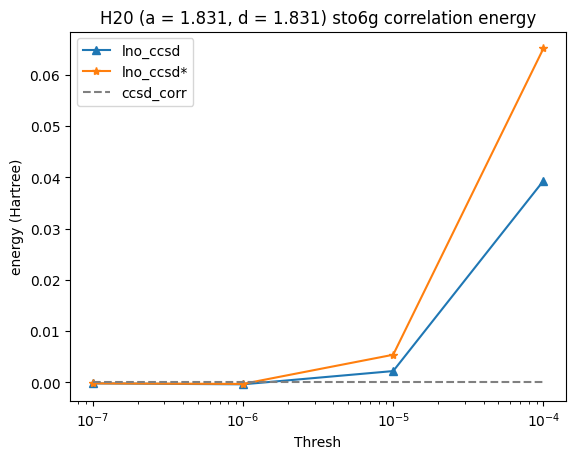

In [36]:
plt.plot(thresh,lno_ccsd1,'^-',label='lno_ccsd')
plt.plot(thresh,lno_ccsd2,'*-',label='lno_ccsd*')
x = np.linspace(min(thresh),max(thresh),100)
plt.plot(x,[0]*100,'--',color='grey',label='ccsd_corr')
plt.xlabel('Thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 1.831, d = 1.831) sto6g correlation energy')
plt.legend()
plt.show()

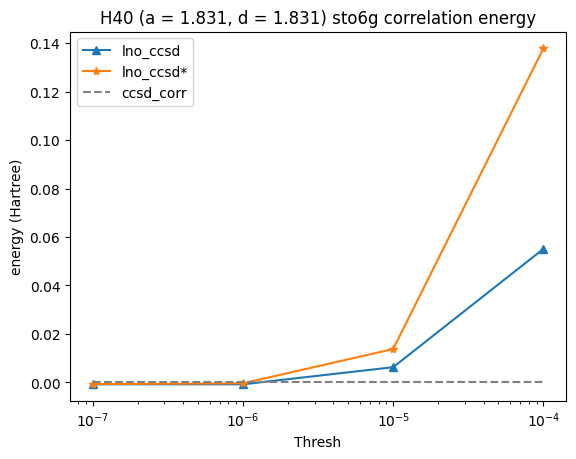

In [ ]:
thresh = np.array([1e-4,1e-5,1e-6,1e-7])
lno_ccsd1 = np.array([0.0551203467,0.0062872806,-0.0007798809,-0.0007708415])
lno_ccsd2 = np.array([0.1378461678,0.0137756014,-0.0003654174,-0.0006814049])
plt.plot(thresh,lno_ccsd1,'^-',label='lno_ccsd')
plt.plot(thresh,lno_ccsd2,'*-',label='lno_ccsd*')
x = np.linspace(min(thresh),max(thresh),100)
plt.plot(x,[0]*100,'--',color='grey',label='ccsd_corr')
plt.xlabel('Thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H40 (a = 1.831, d = 1.831) sto6g correlation energy')
plt.legend()
plt.show()

In [2]:
# localization before
# a=d=1.831 eql
# converged SCF energy = -10.5113174115856
# Init t2, MP2 energy = -10.7237511158851 E_corr(MP2) -0.212433704299474
# RCCSD converged
# E(RCCSD) = -10.82386829894422  E_corr = -0.3125508873585868
# DMRG energy =  -10.832557941737981
# AFQMC energy: -10.83072 +/- 0.00009
e_mf = -10.5113174115856
mp2_corr = -0.212433704299474
ccsd_corr = -0.3125508873585868
afqmc_e = -10.83072
afqmc_err = 0.00009
e_dmrg = -10.832557941737981
data = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.174284       -0.250859       -0.295390       0.021823        -0.251572       0.000027        -0.02024536  3.60       4       5.50    7       548.85
 (1.00e-04,1.00e-05)     -0.207176       -0.306490       -0.348130       0.007260        -0.308186       0.000050        0.01264674  7.00        10      10.20           13      701.45
 (1.00e-05,1.00e-06)     -0.211923       -0.312713       -0.264621       0.032215        -0.317392       0.000133        0.01739352  12.40       14      15.00           17      854.78
 (1.00e-06,1.00e-07)     -0.212406       -0.312720       -0.348583       0.010037        -0.319077       0.000159        0.01787697  17.40       20      18.60           20      1034.90
 (1.00e-07,1.00e-08)     -0.212433       -0.312561       -0.333557       0.007603        -0.319076       0.000244        0.01790399  19.80       20      19.90           20      1132.60
'''

lno_thresh1,lno_mp2_corr1,lno_cc_corr1,lno_qmc_cc_corr1,lno_qmc_cc_err1,_ \
    = data_maker.lno_data(data)

mp2_cr1 = mp2_corr - lno_mp2_corr1

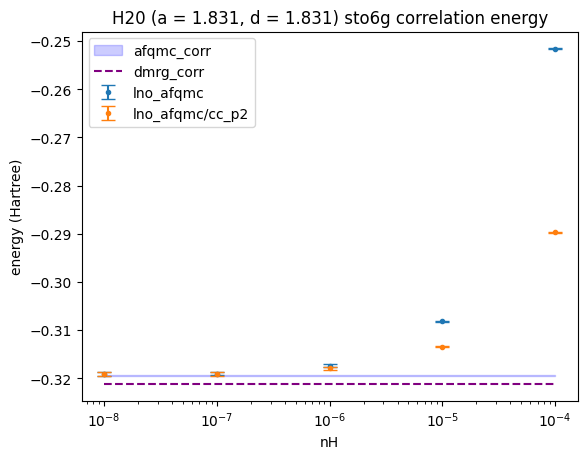

In [7]:
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr,yerr=lno_qmc_cc_err*2,fmt='.',capsize=5,label='lno_afqmc')
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr+mp2_cr,yerr=lno_qmc_cc_err*2,fmt='.',capsize=5,label='lno_afqmc/cc_p2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err*2,afqmc_e-e_mf-afqmc_err*2, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 1.831, d = 1.831) sto6g correlation energy')
plt.legend()
plt.show()

In [3]:
# a=d=1.831 eql
# converged SCF energy = -10.5113174115856
# RCCSD converged
# E(RCCSD) = -10.82386829894422  E_corr = -0.3125508873585868
# DMRG energy =  -10.832557941737981
# AFQMC energy: -10.83072 +/- 0.00009
e_mf = -10.5113174115856
ccsd_corr = -0.3125508873585868
afqmc_e = -10.83072
afqmc_err = 0.00009
e_dmrg = -10.832557941737981
data = '''
# thresh(occ,vir)       mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  mp2_correction  nelec_avg   nelec_max  norb_avg   norb_max    run_time
  (1.00e-03,1.00e-04)  -0.189452  -0.273244  0.954893  0.000093  -0.258949  0.000466  0.988924  0.002431  -1.629646  0.004260  0.625987  0.002206  -0.014736  0.000459  -0.273687        0.000041         -0.02298171  4.40      6        6.40           8       682.58
  (1.00e-04,1.00e-05)  -0.210327  -0.310328  0.881252  0.000149  -0.271938  0.000457  3.098521  0.007059  -5.771375  0.013351  2.632999  0.006636  -0.039855  0.000434  -0.311791        0.000057         -0.00210672  8.40      10       11.00          13      857.84
  (1.00e-05,1.00e-06)  -0.212141  -0.312911  0.825635  0.000214  -0.257207  0.000502  5.534237  0.017509  -10.589656  0.033720  4.996040  0.016558  -0.059380  0.000422  -0.316584       0.000103         -0.00029271  12.80     16       15.40          18      1010.31
  (1.00e-06,1.00e-07)  -0.212421  -0.312730  0.775793  0.000264  -0.242007  0.000501  8.329124  0.024583  -16.093805  0.047679  7.688405  0.023371  -0.076280  0.000389  -0.318289       0.000161         -0.00001272  17.60     20       18.80          20      1225.91
  (1.00e-07,1.00e-08)  -0.212433  -0.312574  0.758119  0.000307  -0.235653  0.000452  9.514297  0.023025  -18.421933  0.044646  8.824306  0.021873  -0.083330  0.000325  -0.318985       0.000170         -0.00000071  19.60     20       19.80          20      1298.36
  (1.00e-09,1.00e-10)  -0.212433  -0.312552  0.754504  0.000236  -0.234545  0.000468  9.737728  0.026277  -18.861547  0.050994  9.039332  0.024980  -0.084486  0.000324  -0.319031       0.000187         -0.00000071  20.00     20       20.00          20      1319.72
'''

(lno_thresh,lno_mp2_corr,lno_ccsd_corr,olp_r,olp_r_err,
 qmc_hf_cr,qmc_hf_cr_err,qmc_cc_cr0,qmc_cc_cr0_err,
 qmc_cc_cr1,qmc_cc_cr1_err,qmc_cc_cr2,qmc_cc_cr2_err,
 qmc_cc_cr,qmc_cc_cr_err,qmc_corr,qmc_corr_err,mp2_cr,
 nelec_avg,nelec_max,norb_avg,norb_max,time) \
                = data_maker.lno_data_dbg(data)

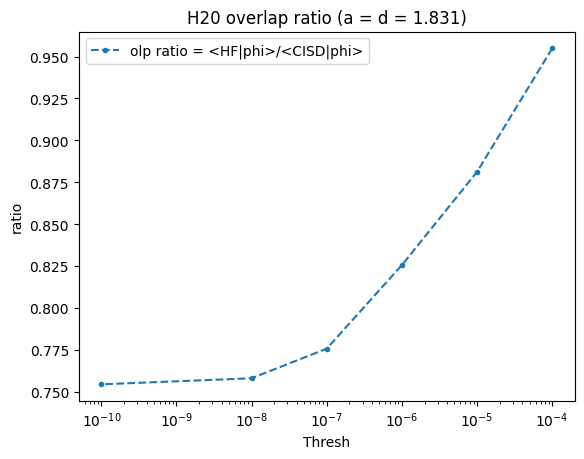

In [6]:
plt.plot(
    lno_thresh,olp_r,'.--',label='olp ratio = <HF|phi>/<CISD|phi>')
plt.xlabel('Thresh')
plt.xscale('log')
plt.ylabel('ratio')
plt.title('H20 overlap ratio (a = d = 1.831)')
plt.legend()
plt.show()

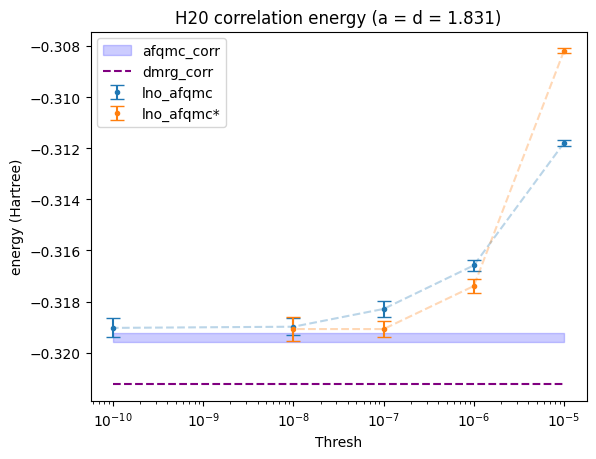

In [7]:
plt.errorbar(
    lno_thresh[1:],qmc_corr[1:],yerr=qmc_corr_err[1:]*2,fmt='.',capsize=5,label='lno_afqmc')
plt.plot(lno_thresh[1:],qmc_corr[1:], '--', color='C0', alpha=0.3)
plt.errorbar(
    lno_thresh1[1:],lno_qmc_cc_corr1[1:],yerr=lno_qmc_cc_err1[1:]*2,fmt='.',capsize=5,label='lno_afqmc*')
plt.plot(lno_thresh1[1:],lno_qmc_cc_corr1[1:], '--', color='C1', alpha=0.3)
# plt.errorbar(
#     lno_thresh,qmc_corr+mp2_cr,yerr=qmc_corr_err*2,fmt='.',capsize=5,label='lno_afqmc_p2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh[1:]),max(lno_thresh[1:]),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err*2,afqmc_e-e_mf-afqmc_err*2, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('Thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 correlation energy (a = d = 1.831)')
plt.legend()
plt.show()

In [15]:
olp_cr = (olp_r[-1]/olp_r)
print(olp_cr)

[0.7901451  0.85617286 0.9138469  0.97255844 0.9952317  1.        ]


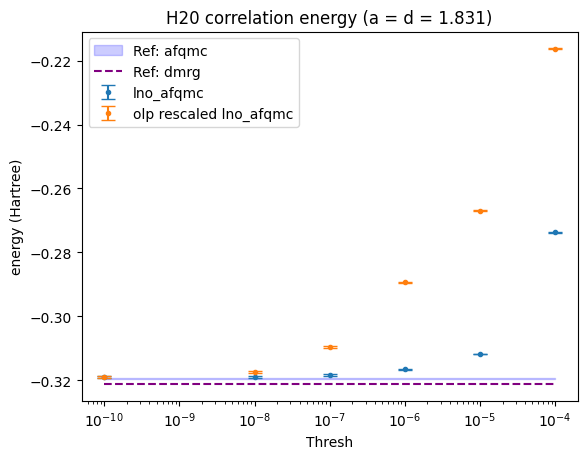

In [19]:
plt.errorbar(
    lno_thresh,qmc_corr,yerr=qmc_corr_err*2,fmt='.',capsize=5,label='lno_afqmc')
plt.errorbar(
    lno_thresh,olp_cr*qmc_corr,yerr=qmc_corr_err*2,fmt='.',capsize=5,label='olp rescaled lno_afqmc')

x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err*2,afqmc_e-e_mf-afqmc_err*2, color='blue', alpha=0.2,label='Ref: afqmc')
plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='Ref: dmrg')
plt.xlabel('Thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 correlation energy (a = d = 1.831)')
plt.legend()
plt.show()

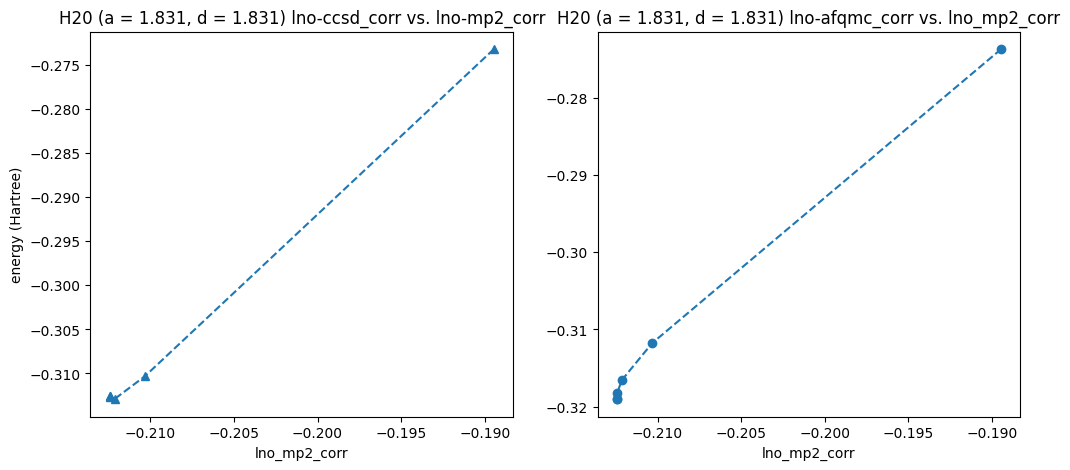

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(lno_mp2_corr,lno_ccsd_corr,'^--')
axs[0].set_ylabel('energy (Hartree)')
axs[0].set_title('H20 (a = 1.831, d = 1.831) lno-ccsd_corr vs. lno-mp2_corr')
axs[0].set_xlabel('lno_mp2_corr')
# axs[0].set_xscale('log')

axs[1].plot(lno_mp2_corr,qmc_corr,'o--')
axs[1].set_title('H20 (a = 1.831, d = 1.831) lno-afqmc_corr vs. lno_mp2_corr')
axs[1].set_xlabel('lno_mp2_corr')
# axs[1].set_xscale('log')

plt.show()

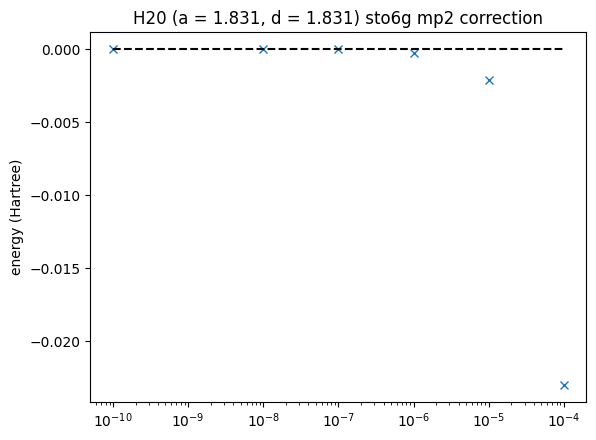

In [32]:
plt.plot(lno_thresh,mp2_cr,'x',label='lno_mp2')
plt.plot(x,[0]*len(x),'--',color='black',label='mp2_ref')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 1.831, d = 1.831) sto6g mp2 correction')
plt.show()

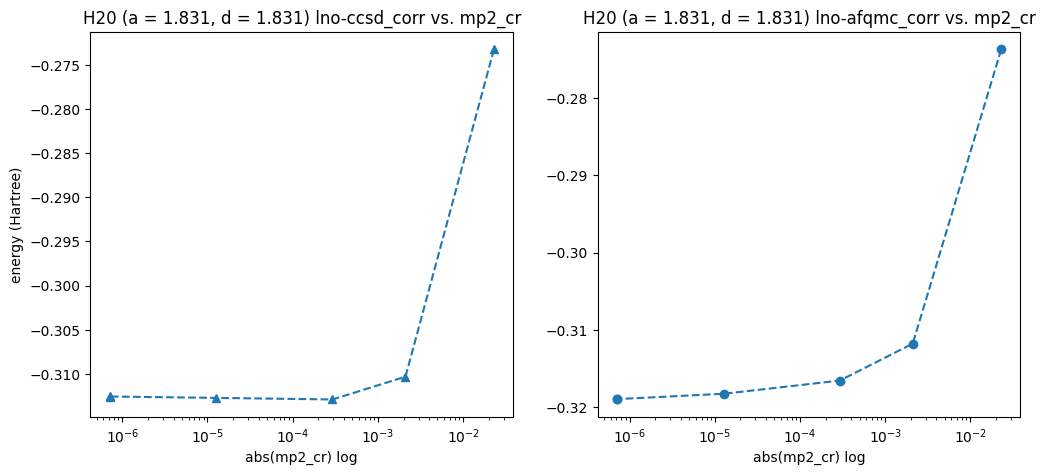

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(abs(mp2_cr),lno_ccsd_corr,'^--')
axs[0].set_ylabel('energy (Hartree)')
axs[0].set_title('H20 (a = 1.831, d = 1.831) lno-ccsd_corr vs. mp2_cr')
axs[0].set_xlabel('abs(mp2_cr) log')
axs[0].set_xscale('log')

axs[1].plot(abs(mp2_cr),qmc_corr,'o--')
axs[1].set_title('H20 (a = 1.831, d = 1.831) lno-afqmc_corr vs. mp2_cr')
axs[1].set_xlabel('abs(mp2_cr) log')
axs[1].set_xscale('log')

plt.show()

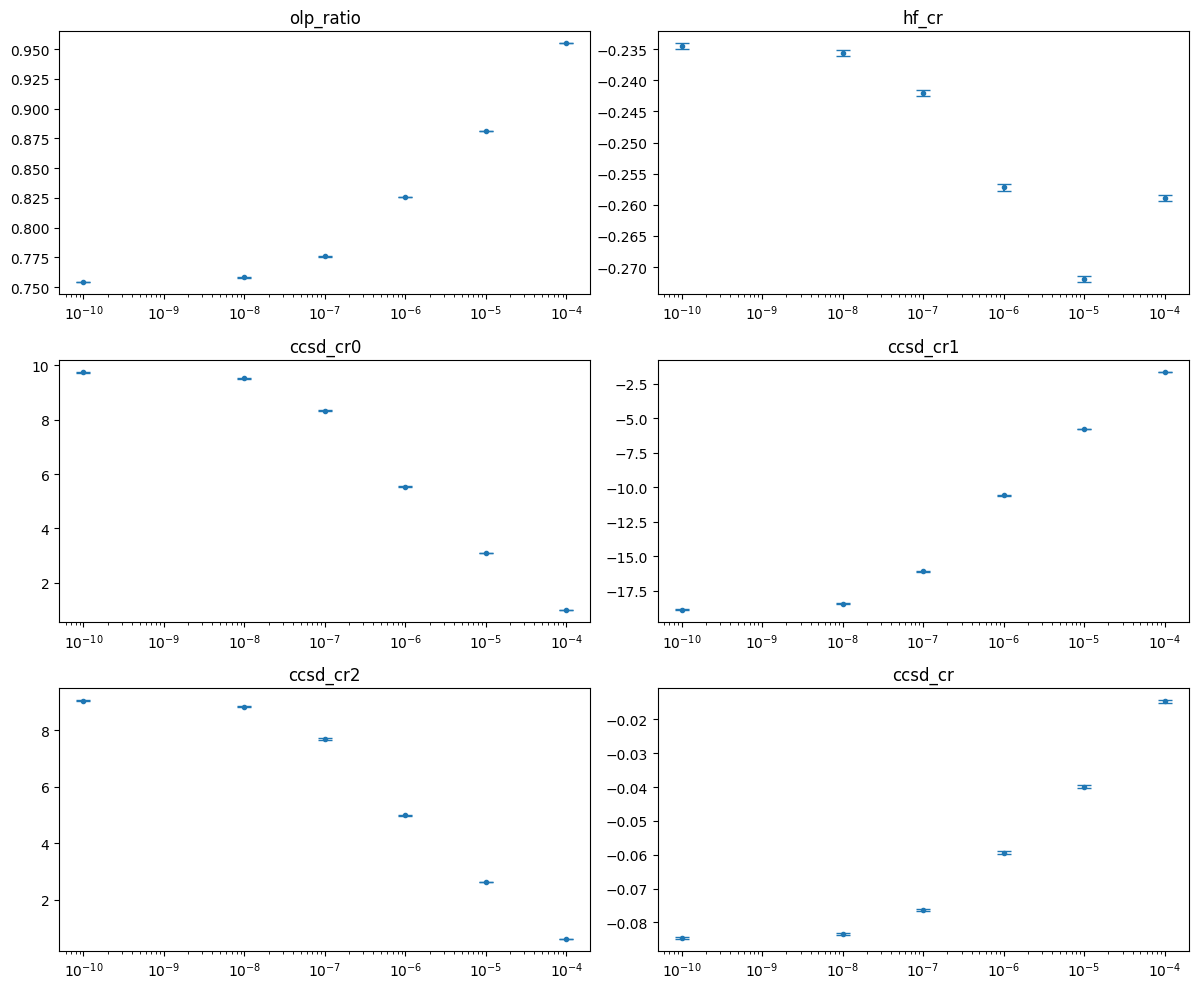

In [26]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].errorbar(lno_thresh,olp_r,yerr=olp_r_err,fmt='.',capsize=5,label='lno_olp_ratio')
axs[0, 0].set_title("olp_ratio")
axs[0, 0].set_xscale('log')

axs[0, 1].errorbar(lno_thresh,qmc_hf_cr,yerr=qmc_hf_cr_err,fmt='.',capsize=5,label='lno_hf_cr')
axs[0, 1].set_title("hf_cr")
axs[0, 1].set_xscale('log')

# Top-right
axs[1, 0].errorbar(lno_thresh,qmc_cc_cr0,yerr=qmc_cc_cr0_err,fmt='.',capsize=5,label='lno_cc_cr0')
axs[1, 0].set_title("ccsd_cr0")
axs[1, 0].set_xscale('log')

# Bottom-left
axs[1, 1].errorbar(lno_thresh,qmc_cc_cr1,yerr=qmc_cc_cr1_err,fmt='.',capsize=5,label='lno_cc_cr0')
axs[1, 1].set_title("ccsd_cr1")
axs[1, 1].set_xscale('log')

# Bottom-right
axs[2, 0].errorbar(lno_thresh,qmc_cc_cr2,yerr=qmc_cc_cr2_err,fmt='.',capsize=5,label='lno_cc_cr0')
axs[2, 0].set_title("ccsd_cr2")
axs[2, 0].set_xscale('log')

axs[2, 1].errorbar(lno_thresh,qmc_cc_cr,yerr=qmc_cc_cr_err,fmt='.',capsize=5,label='lno_cc_cr')
axs[2, 1].set_title("ccsd_cr")
axs[2, 1].set_xscale('log')

plt.tight_layout()
plt.show()

In [3]:
# a=d=1.831 eql
# converged SCF energy = -10.5113174115856
# RCCSD converged
# E(RCCSD) = -10.82386829894422  E_corr = -0.3125508873585868
# DMRG energy =  -10.832557941737981
# AFQMC energy: -10.83072 +/- 0.00009
e_mf = -10.5113174115856
ccsd_corr = -0.3125508873585868
afqmc_e = -10.83072
afqmc_err = 0.00009
e_dmrg = -10.832557941737981
data = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.189450       0.000000        -0.175970       0.112002        -0.273294       0.000059        -0.02298393  4.40       6       6.40    8       640.89
 (1.00e-04,1.00e-05)     -0.210329       0.000000        -0.291853       0.038271        -0.309425       0.000062        -0.00210430  8.40       10      11.00           13      805.10
 (1.00e-05,1.00e-06)     -0.212140       0.000000        -0.333712       0.033885        -0.314272       0.000117        -0.00029366  12.80      16      15.40           18      931.65
 (1.00e-06,1.00e-07)     -0.212419       0.000000        -0.271182       0.053664        -0.317537       0.000175        -0.00001463  17.60      20      18.80           20      1129.00
 (1.00e-07,1.00e-08)     -0.212433       0.000000        -0.327063       0.020660        -0.318872       0.000172        -0.00000056  19.60      20      19.80           20      1207.29
 (1.00e-09,1.00e-10)     -0.212434       0.000000        -0.313568       0.017673        -0.319221       0.000224        -0.00000001  20.00      20      20.00           20      1221.80
'''
lno_thresh,lno_qmc_cc_corr,lno_qmc_cc_err,lno_cc_corr,mp2_cr = lno_data(data)

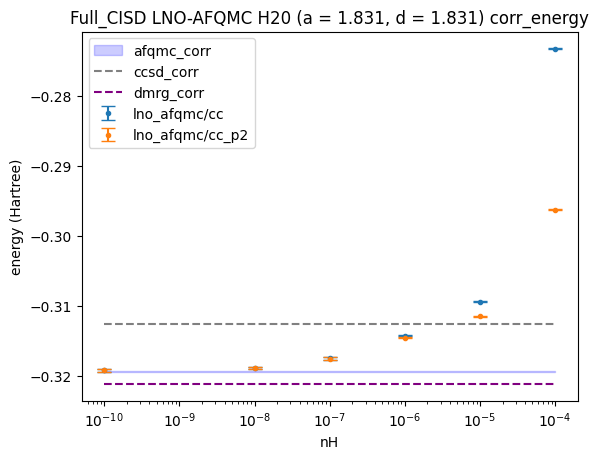

In [ ]:
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc/cc')
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr+mp2_cr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc/cc_p2')
# plt.plot(
#     lno_thresh,lno_cc_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('Full_CCSD LNO-AFQMC H20 (a = 1.831, d = 1.831) corr_energy')
plt.legend()
plt.show()

In [3]:
# FULL CISD
# a=d=1.831 eql
# converged SCF energy = -10.5113174115856
# RCCSD converged
# E(RCCSD) = -10.82386829894422  E_corr = -0.3125508873585868
# DMRG energy =  -10.832557941737981
# AFQMC energy: -10.83072 +/- 0.00009
# e_mf = -10.5113174115856
# ccsd_corr = -0.3125508873585868
# afqmc_e = -10.83072
# afqmc_err = 0.00009
# e_dmrg = -10.832557941737981
data = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.195684       0.000000        -0.267035       0.017996        -0.278103       0.000109        -0.01884451  4.80       6       6.80    8       652.78
 (1.00e-04,1.00e-05)     -0.212182       0.000000        -0.313879       0.006121        -0.305062       0.000139        -0.00234678  8.40       10      11.20           14      808.24
 (1.00e-05,1.00e-06)     -0.214181       0.000000        0.149156        0.472509        -0.309211       0.000193        -0.00034697  12.80      16      15.80           18      957.65
 (1.00e-06,1.00e-07)     -0.214509       0.000000        -0.325498       0.006160        -0.311253       0.000262        -0.00001932  17.60      20      18.80           20      1138.02
 (1.00e-07,1.00e-08)     -0.214528       0.000000        -0.343407       0.038695        -0.312080       0.000253        0.00000001  20.00       20      20.00           20      1231.76
'''
lno_thresh,lno_qmc_cc_corr,lno_qmc_cc_err,lno_cc_corr,mp2_cr = lno_ccsd.lno_data(data)

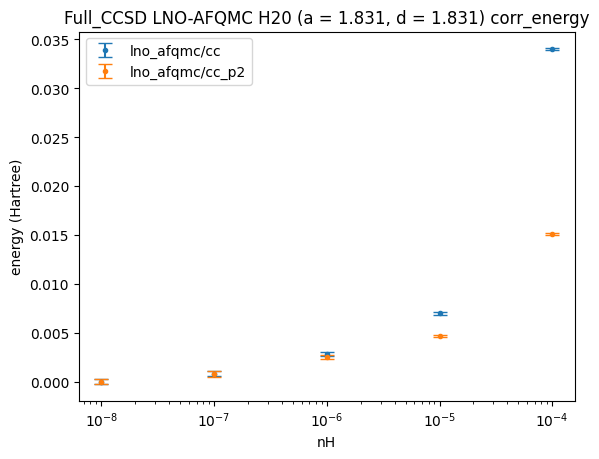

In [5]:
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr-lno_qmc_cc_corr[-1],yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc/cc')
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr+mp2_cr-lno_qmc_cc_corr[-1],yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc/cc_p2')
# plt.plot(
#     lno_thresh,lno_cc_corr,'^',label='lno_ccsd')
# x = np.linspace(min(lno_thresh),max(lno_thresh),100)
# plt.fill_between(
#     x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# # plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
# plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('nH')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('Full_CCSD LNO-AFQMC H20 (a = 1.831, d = 1.831) corr_energy')
plt.legend()
plt.show()

In [22]:
# a=1.831 d=3
# converged SCF energy = -10.7902563668634
# E_corr(MP2) -0.196801273811774
# E(RCCSD) = -11.11588133074048  E_corr = -0.3256249638770554
# DMRG energy (extrapolated) =  -11.116780958599403 +/- 0.0000000000
# AFQMC energy: -11.11581 +/- 0.00009
e_mf = -10.7902563668634
mp2_corr = -0.196801273811774
ccsd_corr = -0.3256249638770554
e_dmrg = -11.116780958599403
afqmc_e = -11.11581
afqmc_err = 0.00009

data = '''
# thresh(occ,vir)       mp2_corr  ccsd_corr  olp_ratio  err       qmc_hf_cr    err   qmc_cc_cr0   err     qmc_cc_cr1   err    qmc_cc_cr2   err      qmc_cc_cr   err     qmc_orb_en          err         mp2_correction  nelec_avg   nelec_max  norb_avg   norb_max    run_time
  (1.00e-03,1.00e-04)  -0.187148  -0.316636  0.974395  0.000079  -0.304262  0.000881  0.425829  0.001241  -0.519113  0.001503  0.080908  0.001142  -0.012377  0.000881  -0.316636        0.000000         -0.00965327  2.00      2        3.80           4       511.52
  (1.00e-04,1.00e-05)  -0.196232  -0.325242  0.932537  0.000102  -0.299637  0.000898  1.607556  0.005053  -2.816529  0.008900  1.183565  0.004685  -0.025407  0.000853  -0.325045        0.000067         -0.00056927  5.60      6        5.60           6       658.79
  (1.00e-05,1.00e-06)  -0.196448  -0.325430  0.932428  0.000096  -0.301492  0.000844  1.615152  0.006140  -2.840423  0.010864  1.200915  0.005703  -0.024353  0.000789  -0.325847        0.000062         -0.00035328  5.60      6        7.20           8       688.41
  (1.00e-06,1.00e-07)  -0.196780  -0.325624  0.898164  0.000110  -0.290319  0.000716  2.806498  0.006982  -5.166098  0.012888  2.323689  0.006613  -0.035912  0.000651  -0.326231        0.000096         -0.00002127  8.80      10       10.20          12      820.99
  (1.00e-07,1.00e-08)  -0.196798  -0.325626  0.871580  0.000129  -0.280044  0.000707  3.852611  0.009768  -7.210051  0.018338  3.311146  0.009135  -0.046290  0.000601  -0.326336        0.000124         -0.00000327  11.60     14       13.40          16      902.06
  (1.00e-08,1.00e-09)  -0.196798  -0.325626  0.833192  0.000130  -0.267104  0.000736  5.482539  0.015051  -10.387868  0.028540  4.846578  0.014065  -0.058751  0.000607  -0.325855       0.000150         -0.00000327  16.00     20       16.80          20      1093.18
  (1.00e-09,1.00e-10)  -0.196798  -0.325626  0.803873  0.000129  -0.258133  0.000741  6.567765  0.019438  -12.533854  0.037131  5.898352  0.018258  -0.067736  0.000578  -0.325867       0.000189         -0.00000327  18.80     20       19.20          20      1245.90
  (1.00e-14,1.00e-15)  -0.196798  -0.325626  0.787333  0.000143  -0.253191  0.000693  7.065723  0.019408  -13.533467  0.037176  6.395136  0.018276  -0.072610  0.000516  -0.325800       0.000210         -0.00000327  20.00     20       20.00          20      1298.25
'''
(lno_thresh,lno_mp2_corr,lno_ccsd_corr,olp_r,olp_r_err,
 qmc_hf_cr,qmc_hf_cr_err,qmc_cc_cr0,qmc_cc_cr0_err,
 qmc_cc_cr1,qmc_cc_cr1_err,qmc_cc_cr2,qmc_cc_cr2_err,
 qmc_cc_cr,qmc_cc_cr_err,qmc_corr,qmc_corr_err,mp2_cr,
 nelec_avg,nelec_max,norb_avg,norb_max,time) \
                = data_maker.lno_data_dbg(data)

In [28]:
olp_cr = olp_r[-1]/olp_r
print(olp_cr)

[0.80802244 0.84429145 0.84439015 0.87660277 0.9033399  0.9449599
 0.9794246  1.        ]


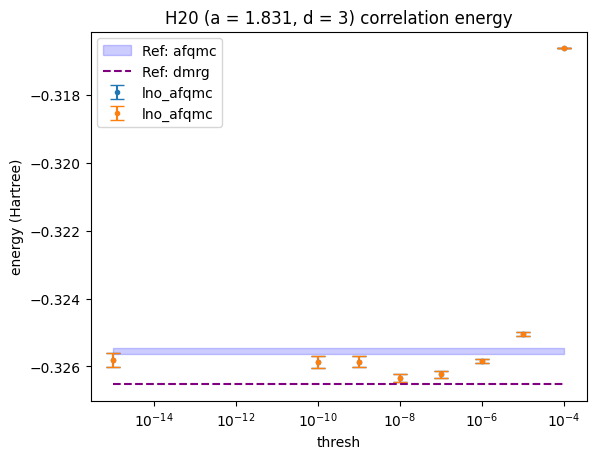

In [31]:
plt.errorbar(
    lno_thresh,qmc_corr,yerr=qmc_corr_err,fmt='.',capsize=5,label='lno_afqmc')
plt.errorbar(
    lno_thresh,qmc_corr,yerr=qmc_corr_err,fmt='.',capsize=5,label='lno_afqmc')
# plt.errorbar(
#     lno_thresh,qmc_corr+mp2_cr,yerr=qmc_corr_err,fmt='.',capsize=5,label='lno_afqmc/cc_p2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='Ref: afqmc')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='Ref: dmrg')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 1.831, d = 3) correlation energy')
plt.legend()
plt.show()

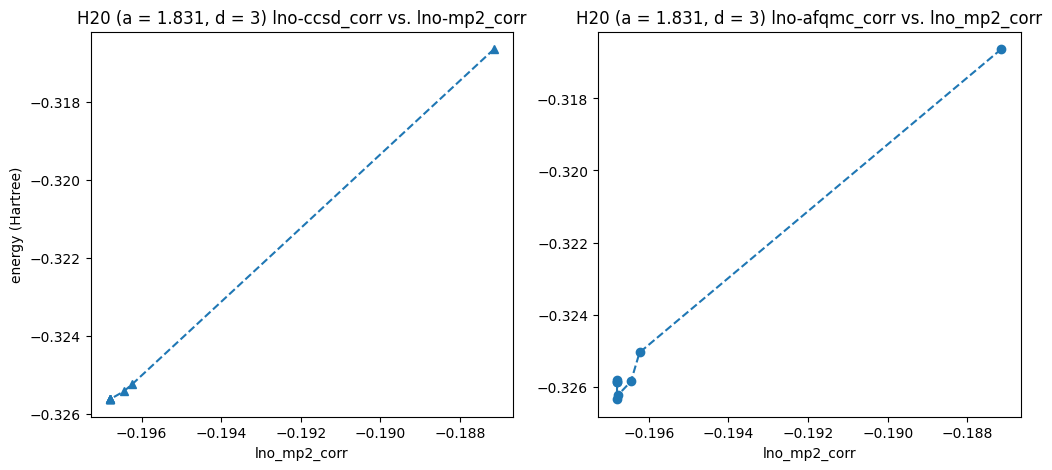

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(lno_mp2_corr,lno_ccsd_corr,'^--')
axs[0].set_ylabel('energy (Hartree)')
axs[0].set_title('H20 (a = 1.831, d = 3) lno-ccsd_corr vs. lno-mp2_corr')
axs[0].set_xlabel('lno_mp2_corr')
# axs[0].set_xscale('log')

axs[1].plot(lno_mp2_corr,qmc_corr,'o--')
axs[1].set_title('H20 (a = 1.831, d = 3) lno-afqmc_corr vs. lno_mp2_corr')
axs[1].set_xlabel('lno_mp2_corr')
# axs[1].set_xscale('log')

plt.show()

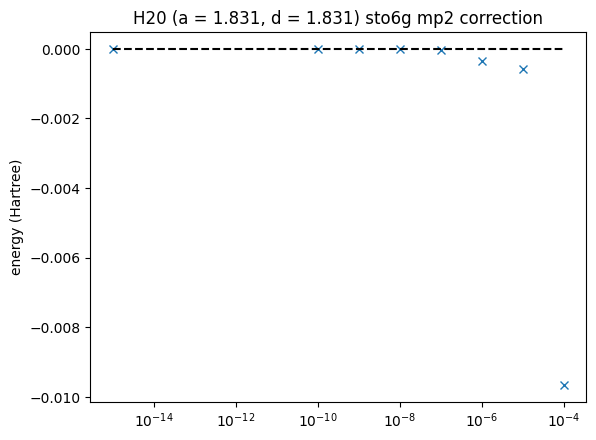

In [74]:
plt.plot(lno_thresh,mp2_cr,'x',label='lno_mp2')
plt.plot(x,[0]*len(x),'--',color='black',label='mp2_ref')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 1.831, d = 1.831) sto6g mp2 correction')
plt.show()

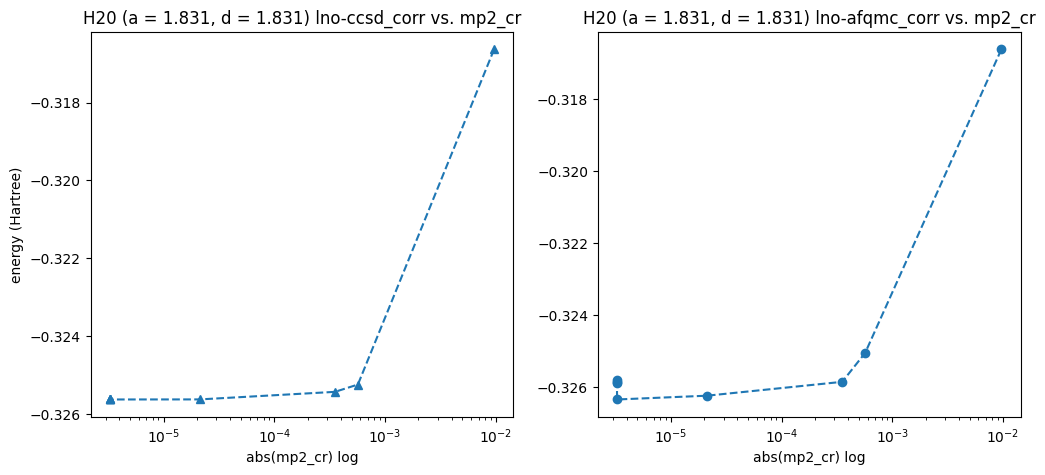

In [75]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(abs(mp2_cr),lno_ccsd_corr,'^--')
axs[0].set_ylabel('energy (Hartree)')
axs[0].set_title('H20 (a = 1.831, d = 1.831) lno-ccsd_corr vs. mp2_cr')
axs[0].set_xlabel('abs(mp2_cr) log')
axs[0].set_xscale('log')

axs[1].plot(abs(mp2_cr),qmc_corr,'o--')
axs[1].set_title('H20 (a = 1.831, d = 1.831) lno-afqmc_corr vs. mp2_cr')
axs[1].set_xlabel('abs(mp2_cr) log')
axs[1].set_xscale('log')

plt.show()

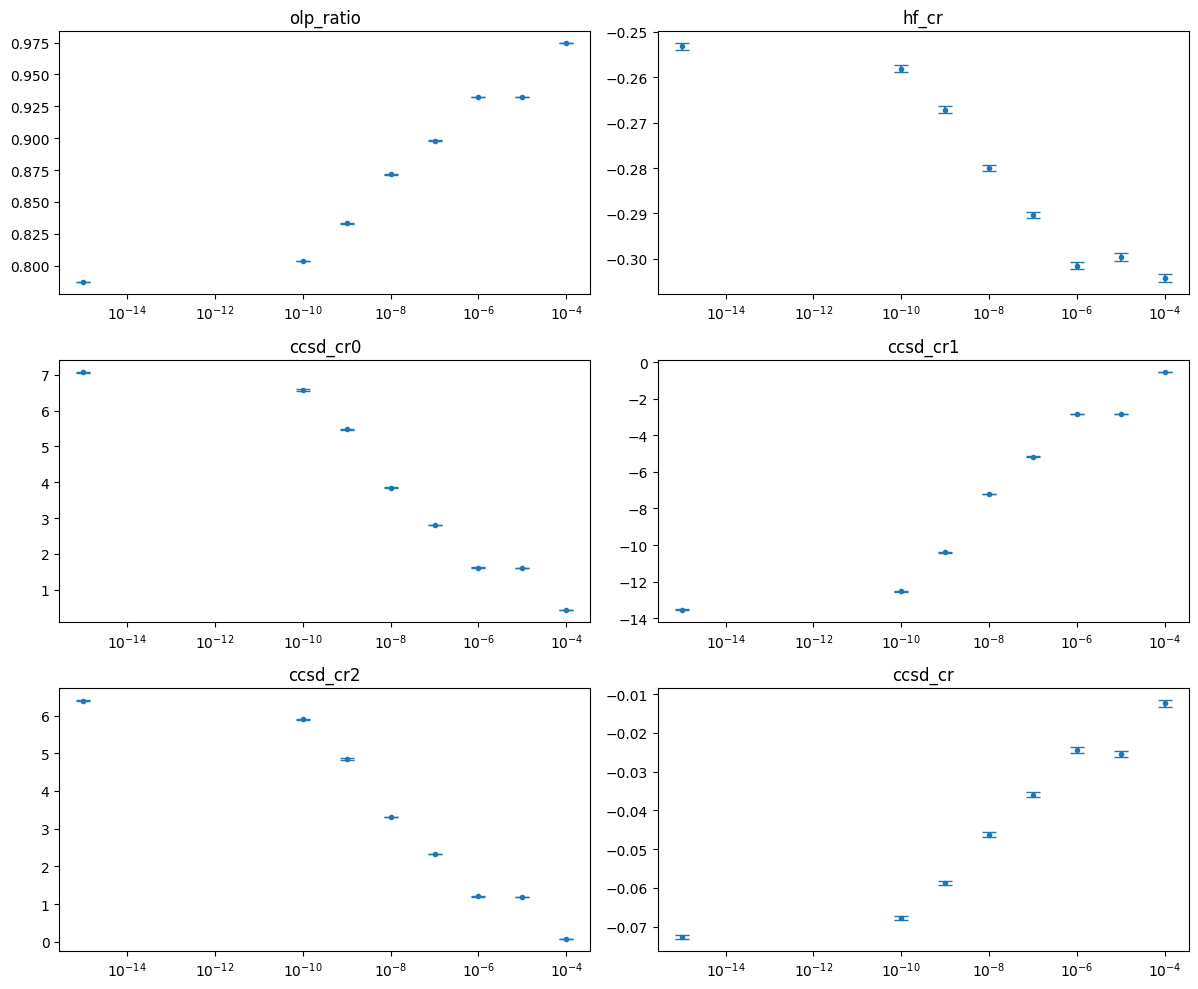

In [76]:
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

axs[0, 0].errorbar(lno_thresh,olp_r,yerr=olp_r_err,fmt='.',capsize=5,label='lno_olp_ratio')
axs[0, 0].set_title("olp_ratio")
axs[0, 0].set_xscale('log')

axs[0, 1].errorbar(lno_thresh,qmc_hf_cr,yerr=qmc_hf_cr_err,fmt='.',capsize=5,label='lno_hf_cr')
axs[0, 1].set_title("hf_cr")
axs[0, 1].set_xscale('log')

# Top-right
axs[1, 0].errorbar(lno_thresh,qmc_cc_cr0,yerr=qmc_cc_cr0_err,fmt='.',capsize=5,label='lno_cc_cr0')
axs[1, 0].set_title("ccsd_cr0")
axs[1, 0].set_xscale('log')

# Bottom-left
axs[1, 1].errorbar(lno_thresh,qmc_cc_cr1,yerr=qmc_cc_cr1_err,fmt='.',capsize=5,label='lno_cc_cr0')
axs[1, 1].set_title("ccsd_cr1")
axs[1, 1].set_xscale('log')

# Bottom-right
axs[2, 0].errorbar(lno_thresh,qmc_cc_cr2,yerr=qmc_cc_cr2_err,fmt='.',capsize=5,label='lno_cc_cr0')
axs[2, 0].set_title("ccsd_cr2")
axs[2, 0].set_xscale('log')

axs[2, 1].errorbar(lno_thresh,qmc_cc_cr,yerr=qmc_cc_cr_err,fmt='.',capsize=5,label='lno_cc_cr')
axs[2, 1].set_title("ccsd_cr")
axs[2, 1].set_xscale('log')

plt.tight_layout()
plt.show()

In [113]:
def each_frg_data_dbg(data):
      new_data = []
      lines = data.splitlines()
      for line in lines:
            columns = line.split()
            if len(columns)>1:
                  if not line.startswith("#"): 
                        new_data.append(columns)

      new_data = np.array(new_data)

      lno_thresh = []
      for i in range(new_data.shape[0]):
            thresh_vir = new_data[:,0][i].split(sep=',')[1]
            thresh_vir = float(thresh_vir.strip('(),'))
            lno_thresh.append(thresh_vir)

      lno_data = np.array(new_data[:,1:],dtype="float32")

      lno_thresh = np.array(lno_thresh,dtype="float32")
      mp2_corr = lno_data[:,0]
      ccsd_corr = lno_data[:,1]
      olp_r = lno_data[:,2]
      olp_r_err = lno_data[:,3]
      qmc_hf_cr = lno_data[:,4]
      qmc_hf_cr_err = lno_data[:,5]
      qmc_cc_cr0 = lno_data[:,6]
      qmc_cc_cr0_err = lno_data[:,7]
      qmc_cc_cr1 = lno_data[:,8]
      qmc_cc_cr1_err = lno_data[:,9]
      qmc_cc_cr2 = lno_data[:,10]
      qmc_cc_cr2_err = lno_data[:,11]
      qmc_cc_cr = lno_data[:,12]
      qmc_cc_cr_err = lno_data[:,13]
      qmc_corr = lno_data[:,14]
      qmc_corr_err = lno_data[:,15]
      nelec = lno_data[:,16]
      norb = lno_data[:,17]
      time = lno_data[:,18]

      return (lno_thresh,mp2_corr,ccsd_corr,olp_r,olp_r_err,
              qmc_hf_cr,qmc_hf_cr_err,qmc_cc_cr0,qmc_cc_cr0_err,
              qmc_cc_cr1,qmc_cc_cr1_err,qmc_cc_cr2,qmc_cc_cr2_err,
              qmc_cc_cr,qmc_cc_cr_err,qmc_corr,qmc_corr_err,nelec,norb,time)

In [101]:
frg1_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018638  -0.031459  0.974830  0.000176  -0.029976  0.000215  0.041854  0.000305  -0.050953  0.000369  0.007615  0.000279  -0.001484  0.000215  -0.031459  0.000000  4  2  52.33
  (1.00e-04,1.00e-05)  -0.019654  -0.032417  0.929103  0.000262  -0.029760  0.000196  0.173406  0.001146  -0.306226  0.002023  0.130194  0.001062  -0.002625  0.000186  -0.032385  0.000015  6  6  68.10
  (1.00e-05,1.00e-06)  -0.019681  -0.032441  0.929005  0.000306  -0.029724  0.000259  0.172915  0.001561  -0.306693  0.002768  0.131029  0.001453  -0.002749  0.000247  -0.032474  0.000020  8  6  71.59
  (1.00e-06,1.00e-07)  -0.019723  -0.032466  0.887751  0.000339  -0.028436  0.000258  0.321694  0.002595  -0.596981  0.004815  0.271213  0.002673  -0.004074  0.000239  -0.032511  0.000026  12  10  88.51
  (1.00e-07,1.00e-08)  -0.019726  -0.032466  0.850721  0.000517  -0.027112  0.000219  0.469827  0.003865  -0.886428  0.007296  0.411224  0.003614  -0.005376  0.000185  -0.032489  0.000041  16  14  98.40
  (1.00e-08,1.00e-09)  -0.019726  -0.032466  0.786904  0.000349  -0.025250  0.000245  0.701132  0.006789  -1.343154  0.013009  0.634799  0.006403  -0.007222  0.000185  -0.032472  0.000065  20  20  132.47
  (1.00e-09,1.00e-10)  -0.019726  -0.032466  0.786805  0.000378  -0.025510  0.000310  0.708453  0.008625  -1.357181  0.016524  0.641687  0.008144  -0.007041  0.000247  -0.032551  0.000071  20  20  131.55
  (1.00e-14,1.00e-15)  -0.019726  -0.032466  0.787716  0.000335  -0.025237  0.000229  0.700663  0.006468  -1.342256  0.012390  0.634335  0.006089  -0.007258  0.000170  -0.032495  0.000068  20  20  133.54
'''
frg2_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018639  -0.031465  0.974850  0.000151  -0.029962  0.000182  0.041813  0.000259  -0.050907  0.000314  0.007591  0.000236  -0.001503  0.000182  -0.031465  0.000000  4  2  50.53
  (1.00e-04,1.00e-05)  -0.019654  -0.032424  0.928676  0.000239  -0.029681  0.000233  0.172958  0.001407  -0.305579  0.002489  0.129900  0.001300  -0.002722  0.000218  -0.032402  0.000020  6  6  68.08
  (1.00e-05,1.00e-06)  -0.019681  -0.032447  0.928821  0.000291  -0.029866  0.000240  0.174052  0.001463  -0.308869  0.002602  0.132200  0.001358  -0.002617  0.000220  -0.032483  0.000025  8  6  71.87
  (1.00e-06,1.00e-07)  -0.019721  -0.032470  0.882961  0.000436  -0.028394  0.000224  0.324804  0.002594  -0.603866  0.004824  0.274924  0.002427  -0.004137  0.000198  -0.032531  0.000032  11  10  87.27
  (1.00e-07,1.00e-08)  -0.019722  -0.032470  0.865874  0.000388  -0.027917  0.000199  0.401757  0.002930  -0.753790  0.005501  0.347394  0.002745  -0.004639  0.000176  -0.032555  0.000034  14  12  90.39
  (1.00e-08,1.00e-09)  -0.019722  -0.032470  0.835447  0.000412  -0.026703  0.000223  0.545346  0.004642  -1.032467  0.008790  0.481334  0.004327  -0.005788  0.000180  -0.032491  0.000048  17  16  106.70
  (1.00e-09,1.00e-10)  -0.019722  -0.032470  0.787633  0.000476  -0.025238  0.000212  0.700737  0.006086  -1.342355  0.011663  0.634408  0.005730  -0.007210  0.000155  -0.032448  0.000062  20  20  131.46
  (1.00e-14,1.00e-15)  -0.019722  -0.032470  0.787357  0.000423  -0.025156  0.000255  0.699058  0.007296  -1.339140  0.013975  0.632817  0.006864  -0.007265  0.000175  -0.032421  0.000077  20  20  131.11
'''
frg3_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018660  -0.031516  0.974603  0.000187  -0.030294  0.000224  0.042292  0.000319  -0.051521  0.000386  0.008007  0.000291  -0.001222  0.000224  -0.031516  0.000000  4  2  52.32
  (1.00e-04,1.00e-05)  -0.019657  -0.032464  0.926314  0.000247  -0.029734  0.000217  0.176060  0.001305  -0.312403  0.002312  0.133604  0.001213  -0.002739  0.000207  -0.032473  0.000018  6  6  66.84
  (1.00e-05,1.00e-06)  -0.019671  -0.032476  0.926047  0.000249  -0.029940  0.000207  0.177106  0.001264  -0.314940  0.002248  0.135239  0.001174  -0.002594  0.000191  -0.032534  0.000024  7  6  69.40
  (1.00e-06,1.00e-07)  -0.019692  -0.032488  0.905014  0.000404  -0.029619  0.000237  0.254335  0.002037  -0.465099  0.003725  0.207804  0.001895  -0.002960  0.000208  -0.032579  0.000034  9  8  77.57
  (1.00e-07,1.00e-08)  -0.019693  -0.032489  0.886000  0.000306  -0.028647  0.000175  0.326172  0.002042  -0.605421  0.003798  0.275332  0.001911  -0.003916  0.000157  -0.032563  0.000026  12  10  88.67
  (1.00e-08,1.00e-09)  -0.019693  -0.032489  0.854960  0.000381  -0.027208  0.000387  0.467463  0.006498  -0.878829  0.012198  0.406106  0.006024  -0.005260  0.000325  -0.032468  0.000040  15  14  96.29
  (1.00e-09,1.00e-10)  -0.019693  -0.032489  0.817095  0.000408  -0.026158  0.000179  0.622231  0.004364  -1.184228  0.008309  0.555626  0.004085  -0.006371  0.000141  -0.032529  0.000043  19  18  124.56
  (1.00e-14,1.00e-15)  -0.019693  -0.032489  0.787089  0.000466  -0.025281  0.000199  0.703786  0.005563  -1.348084  0.010654  0.637084  0.005237  -0.007215  0.000152  -0.032496  0.000058  20  20  128.76
'''
frg4_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018639  -0.031461  0.974387  0.000508  -0.030542  0.000604  0.042626  0.000843  -0.051884  0.001018  0.008339  0.000779  -0.000919  0.000604  -0.031461  0.000000  4  2  52.20
  (1.00e-04,1.00e-05)  -0.019654  -0.032419  0.928507  0.000595  -0.029601  0.000575  0.172322  0.003417  -0.304343  0.006045  0.129239  0.003170  -0.002781  0.000542  -0.032383  0.000020  6  6  68.39
  (1.00e-05,1.00e-06)  -0.019681  -0.032443  0.928970  0.000354  -0.029998  0.000197  0.174489  0.001167  -0.309503  0.002071  0.132512  0.001085  -0.002502  0.000187  -0.032500  0.000020  8  6  71.18
  (1.00e-06,1.00e-07)  -0.019723  -0.032468  0.886797  0.000299  -0.028613  0.000197  0.324027  0.002271  -0.601559  0.004218  0.273608  0.002122  -0.003924  0.000177  -0.032537  0.000029  12  10  87.43
  (1.00e-07,1.00e-08)  -0.019726  -0.032468  0.845991  0.000568  -0.026928  0.000277  0.471847  0.003657  -0.891482  0.006916  0.414040  0.003436  -0.005595  0.000182  -0.032522  0.000048  15  14  94.83
  (1.00e-08,1.00e-09)  -0.019726  -0.032468  0.813803  0.000421  -0.025793  0.000175  0.618086  0.004370  -1.177648  0.008330  0.552872  0.004094  -0.006690  0.000137  -0.032483  0.000047  19  18  123.14
  (1.00e-09,1.00e-10)  -0.019726  -0.032468  0.787330  0.000420  -0.025263  0.000193  0.700659  0.005335  -1.342236  0.010224  0.634424  0.005036  -0.007152  0.000151  -0.032416  0.000053  20  20  128.81
  (1.00e-14,1.00e-15)  -0.019726  -0.032468  0.787496  0.000348  -0.025249  0.000176  0.700807  0.004969  -1.342509  0.009521  0.634543  0.004681  -0.007158  0.000133  -0.032407  0.000055  20  20  130.62
'''
frg5_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018998  -0.032417  0.973261  0.000184  -0.031302  0.000220  0.044264  0.000314  -0.054211  0.000384  0.008832  0.000290  -0.001115  0.000220  -0.032417  0.000000  3  2  50.51
  (1.00e-04,1.00e-05)  -0.019497  -0.032897  0.949906  0.000254  -0.030767  0.000249  0.107642  0.000875  -0.177292  0.001443  0.067535  0.000809  -0.002115  0.000242  -0.032882  0.000012  4  4  58.25
  (1.00e-05,1.00e-06)  -0.019510  -0.032908  0.949714  0.000246  -0.031210  0.000230  0.109124  0.000800  -0.180451  0.001323  0.069599  0.000745  -0.001727  0.000222  -0.032938  0.000013  5  4  60.70
  (1.00e-06,1.00e-07)  -0.019531  -0.032920  0.927507  0.000331  -0.030584  0.000232  0.182807  0.001389  -0.323632  0.002459  0.138398  0.001286  -0.002427  0.000220  -0.033011  0.000022  7  6  68.51
  (1.00e-07,1.00e-08)  -0.019532  -0.032920  0.908478  0.000338  -0.029376  0.000213  0.254116  0.001850  -0.462914  0.003372  0.205158  0.001715  -0.003640  0.000195  -0.033017  0.000035  10  8  79.69
  (1.00e-08,1.00e-09)  -0.019532  -0.032920  0.874988  0.000383  -0.028253  0.000247  0.404341  0.003551  -0.752730  0.006612  0.343633  0.003271  -0.004756  0.000214  -0.033009  0.000052  13  12  88.88
  (1.00e-09,1.00e-10)  -0.019532  -0.032920  0.840560  0.000320  -0.027105  0.000187  0.557309  0.003914  -1.051534  0.007392  0.488318  0.003628  -0.005907  0.000151  -0.033012  0.000041  17  16  108.46
  (1.00e-14,1.00e-15)  -0.019532  -0.032920  0.787555  0.000545  -0.025533  0.000232  0.723838  0.006627  -1.385718  0.012693  0.654435  0.006253  -0.007446  0.000189  -0.032979  0.000060  20  20  128.95
'''
frg6_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018998  -0.032417  0.973307  0.000236  -0.031288  0.000298  0.044238  0.000421  -0.054179  0.000513  0.008812  0.000390  -0.001129  0.000298  -0.032417  0.000000  3  2  51.23
  (1.00e-04,1.00e-05)  -0.019497  -0.032897  0.949950  0.000280  -0.030911  0.000259  0.108217  0.000927  -0.178249  0.001533  0.068057  0.000861  -0.001975  0.000256  -0.032886  0.000012  4  4  58.38
  (1.00e-05,1.00e-06)  -0.019510  -0.032908  0.949184  0.000295  -0.031368  0.000234  0.109725  0.000831  -0.181446  0.001379  0.070150  0.000775  -0.001570  0.000228  -0.032938  0.000010  5  4  60.50
  (1.00e-06,1.00e-07)  -0.019531  -0.032920  0.927869  0.000287  -0.030340  0.000250  0.181237  0.001486  -0.320833  0.002629  0.136961  0.001378  -0.002636  0.000235  -0.032976  0.000019  7  6  70.27
  (1.00e-07,1.00e-08)  -0.019532  -0.032920  0.907971  0.000383  -0.029107  0.000270  0.251919  0.002353  -0.458939  0.004298  0.203145  0.002195  -0.003874  0.000250  -0.032982  0.000030  10  8  80.48
  (1.00e-08,1.00e-09)  -0.019532  -0.032920  0.874635  0.000354  -0.028823  0.000211  0.412358  0.003063  -0.767660  0.005707  0.351077  0.002826  -0.004224  0.000184  -0.033048  0.000036  13  12  88.43
  (1.00e-09,1.00e-10)  -0.019532  -0.032920  0.840674  0.000393  -0.027332  0.000226  0.561767  0.004676  -1.059932  0.008827  0.492445  0.004338  -0.005719  0.000188  -0.033051  0.000053  17  16  108.67
  (1.00e-14,1.00e-15)  -0.019532  -0.032920  0.787416  0.000424  -0.025689  0.000196  0.728173  0.005678  -1.394013  0.010877  0.658480  0.005330  -0.007360  0.000135  -0.033049  0.000071  20  20  129.43
'''
frg7_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018639  -0.031461  0.974733  0.000299  -0.030179  0.000198  0.042120  0.001161  -0.051276  0.002048  0.007874  0.001075  -0.001282  0.000189  -0.031461  0.000000  4  2  50.17
  (1.00e-04,1.00e-05)  -0.019654  -0.032419  0.928865  0.000286  -0.029859  0.000198  0.173818  0.001161  -0.306980  0.002048  0.130639  0.001075  -0.002524  0.000189  -0.032383  0.000018  6  6  67.19
  (1.00e-05,1.00e-06)  -0.019681  -0.032443  0.928772  0.000338  -0.029807  0.000555  0.173440  0.003411  -0.307645  0.006050  0.131527  0.003148  -0.002678  0.000510  -0.032486  0.000027  8  6  70.98
  (1.00e-06,1.00e-07)  -0.019723  -0.032468  0.887373  0.000304  -0.027954  0.000223  0.316332  0.002520  -0.587277  0.004678  0.266448  0.002362  -0.004497  0.000212  -0.032451  0.000025  12  10  88.31
  (1.00e-07,1.00e-08)  -0.019726  -0.032468  0.847082  0.000366  -0.027307  0.000261  0.478885  0.004646  -0.904794  0.008783  0.420629  0.004352  -0.005280  0.000219  -0.032587  0.000052  15  14  95.54
  (1.00e-08,1.00e-09)  -0.019726  -0.032468  0.813634  0.000422  -0.026041  0.000160  0.623510  0.003886  -1.187949  0.007406  0.557974  0.003642  -0.006465  0.000126  -0.032506  0.000042  19  18  123.81
  (1.00e-09,1.00e-10)  -0.019726  -0.032468  0.787225  0.000355  -0.025337  0.000192  0.704146  0.005339  -1.348927  0.010232  0.637579  0.005033  -0.007202  0.000149  -0.032538  0.000060  20  20  129.02
  (1.00e-14,1.00e-15)  -0.019726  -0.032468  0.786716  0.000355  -0.025351  0.000232  0.704312  0.006081  -1.349250  0.011653  0.637726  0.005729  -0.007213  0.000166  -0.032564  0.000077  20  20  129.04
'''
frg8_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018660  -0.031516  0.974605  0.000166  -0.030244  0.000211  0.042228  0.000303  -0.051445  0.000368  0.007945  0.000276  -0.001273  0.000211  -0.031516  0.000000  4  2  50.11
  (1.00e-04,1.00e-05)  -0.019657  -0.032464  0.926644  0.000334  -0.029721  0.000238  0.175762  0.001415  -0.311858  0.002510  0.133347  0.001318  -0.002749  0.000225  -0.032470  0.000044  6  6  67.93
  (1.00e-05,1.00e-06)  -0.019671  -0.032476  0.926754  0.000319  -0.029804  0.000245  0.176445  0.001485  -0.313776  0.002644  0.134611  0.001389  -0.002720  0.000231  -0.032523  0.000020  7  6  69.97
  (1.00e-06,1.00e-07)  -0.019692  -0.032488  0.904932  0.000330  -0.029221  0.000204  0.250824  0.001783  -0.458689  0.003262  0.204529  0.001661  -0.003336  0.000184  -0.032557  0.000030  9  8  77.96
  (1.00e-07,1.00e-08)  -0.019693  -0.032489  0.886281  0.000416  -0.028596  0.000250  0.325621  0.002908  -0.604382  0.005398  0.274734  0.002709  -0.004026  0.000222  -0.032622  0.000045  12  10  87.71
  (1.00e-08,1.00e-09)  -0.019693  -0.032489  0.854678  0.000361  -0.027345  0.000193  0.469935  0.003405  -0.883471  0.006404  0.408403  0.003162  -0.005132  0.000164  -0.032477  0.000034  15  14  96.32
  (1.00e-09,1.00e-10)  -0.019693  -0.032489  0.816150  0.000401  -0.026076  0.000350  0.620940  0.008952  -1.181775  0.017045  0.554353  0.008358  -0.006482  0.000265  -0.032557  0.000088  19  18  124.45
  (1.00e-14,1.00e-15)  -0.019693  -0.032489  0.787578  0.000336  -0.025465  0.000235  0.709573  0.006565  -1.359169  0.012570  0.642521  0.006172  -0.007075  0.000170  -0.032540  0.000089  20  20  128.81
'''
frg9_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018639  -0.031465  0.974864  0.000180  -0.029999  0.000218  0.041858  0.000307  -0.050961  0.000371  0.007636  0.000282  -0.001467  0.000218  -0.031465  0.000000  4  2  51.17
  (1.00e-04,1.00e-05)  -0.019654  -0.032424  0.928428  0.000243  -0.029810  0.000238  0.173838  0.001397  -0.307144  0.002468  0.130715  0.001295  -0.002591  0.000224  -0.032401  0.000017  6  6  68.07
  (1.00e-05,1.00e-06)  -0.019681  -0.032447  0.928509  0.000353  -0.029779  0.000238  0.173503  0.003737  -0.307887  0.006616  0.131676  0.003481  -0.002709  0.000224  -0.032488  0.000018  8  6  70.64
  (1.00e-06,1.00e-07)  -0.019721  -0.032470  0.883492  0.000336  -0.028835  0.000240  0.330394  0.002749  -0.614250  0.005110  0.280100  0.002562  -0.003756  0.000205  -0.032591  0.000051  11  10  86.60
  (1.00e-07,1.00e-08)  -0.019722  -0.032470  0.866163  0.000390  -0.027809  0.000178  0.400196  0.002675  -0.750859  0.005020  0.345960  0.002495  -0.004703  0.000152  -0.032513  0.000035  14  12  89.97
  (1.00e-08,1.00e-09)  -0.019722  -0.032470  0.835714  0.000594  -0.026623  0.000219  0.544087  0.004594  -1.030100  0.008701  0.480152  0.004283  -0.005862  0.000179  -0.032485  0.000051  17  16  106.14
  (1.00e-09,1.00e-10)  -0.019722  -0.032470  0.787559  0.000395  -0.025019  0.000209  0.694663  0.005926  -1.330714  0.011354  0.628704  0.005585  -0.007347  0.000161  -0.032366  0.000050  20  20  129.93
  (1.00e-14,1.00e-15)  -0.019722  -0.032470  0.787116  0.000455  -0.025102  0.000218  0.697816  0.006006  -1.336764  0.011505  0.631638  0.005660  -0.007310  0.000165  -0.032411  0.000052  20  20  129.22
'''
frg10_data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_orb_en   err  nelec   norb  time
  (1.00e-03,1.00e-04)  -0.018638  -0.031459  0.974513  0.000186  -0.030476  0.000228  0.042536  0.000326  -0.051776  0.000394  0.008257  0.000297  -0.000983  0.000228  -0.031459  0.000000  4  2  50.95
  (1.00e-04,1.00e-05)  -0.019654  -0.032417  0.928976  0.000315  -0.029793  0.000235  0.173533  0.001390  -0.306455  0.002453  0.130335  0.001283  -0.002586  0.000220  -0.032380  0.000019  6  6  67.56
  (1.00e-05,1.00e-06)  -0.019681  -0.032441  0.928508  0.000253  -0.029996  0.000172  0.174353  0.001014  -0.309213  0.001800  0.132372  0.000950  -0.002487  0.000166  -0.032483  0.000013  8  6  71.58
  (1.00e-06,1.00e-07)  -0.019723  -0.032466  0.887941  0.000380  -0.028323  0.000187  0.320044  0.002181  -0.593912  0.004049  0.269704  0.002036  -0.004165  0.000169  -0.032487  0.000024  12  10  88.56
  (1.00e-07,1.00e-08)  -0.019726  -0.032466  0.851240  0.000349  -0.027245  0.000156  0.472271  0.002862  -0.891042  0.005404  0.413530  0.002671  -0.005241  0.000131  -0.032486  0.000038  16  14  96.38
  (1.00e-08,1.00e-09)  -0.019726  -0.032466  0.787160  0.000365  -0.025065  0.000189  0.696281  0.005272  -1.333860  0.010100  0.630228  0.004975  -0.007352  0.000150  -0.032416  0.000050  20  20  131.00
  (1.00e-09,1.00e-10)  -0.019726  -0.032466  0.787704  0.000496  -0.025095  0.000222  0.696860  0.006162  -1.334972  0.011807  0.630808  0.005813  -0.007305  0.000173  -0.032399  0.000063  20  20  128.99
  (1.00e-14,1.00e-15)  -0.019726  -0.032466  0.787295  0.000792  -0.025128  0.000207  0.697697  0.005800  -1.336564  0.011113  0.631557  0.005479  -0.007310  0.000169  -0.032438  0.000046  20  20  128.77
'''

In [123]:
from operator import itemgetter
(thresh,orb_en1,orb_en_err1) = itemgetter(0,15,16)(each_frg_data_dbg(frg1_data))
(thresh,orb_en2,orb_en_err2) = itemgetter(0,15,16)(each_frg_data_dbg(frg2_data))
(thresh,orb_en3,orb_en_err3) = itemgetter(0,15,16)(each_frg_data_dbg(frg3_data))
(thresh,orb_en4,orb_en_err4) = itemgetter(0,15,16)(each_frg_data_dbg(frg4_data))
(thresh,orb_en5,orb_en_err5) = itemgetter(0,15,16)(each_frg_data_dbg(frg5_data))
(thresh,orb_en6,orb_en_err6) = itemgetter(0,15,16)(each_frg_data_dbg(frg6_data))
(thresh,orb_en7,orb_en_err7) = itemgetter(0,15,16)(each_frg_data_dbg(frg7_data))
(thresh,orb_en8,orb_en_err8) = itemgetter(0,15,16)(each_frg_data_dbg(frg8_data))
(thresh,orb_en9,orb_en_err9) = itemgetter(0,15,16)(each_frg_data_dbg(frg9_data))
(thresh,orb_en10,orb_en_err10) = itemgetter(0,15,16)(each_frg_data_dbg(frg10_data))

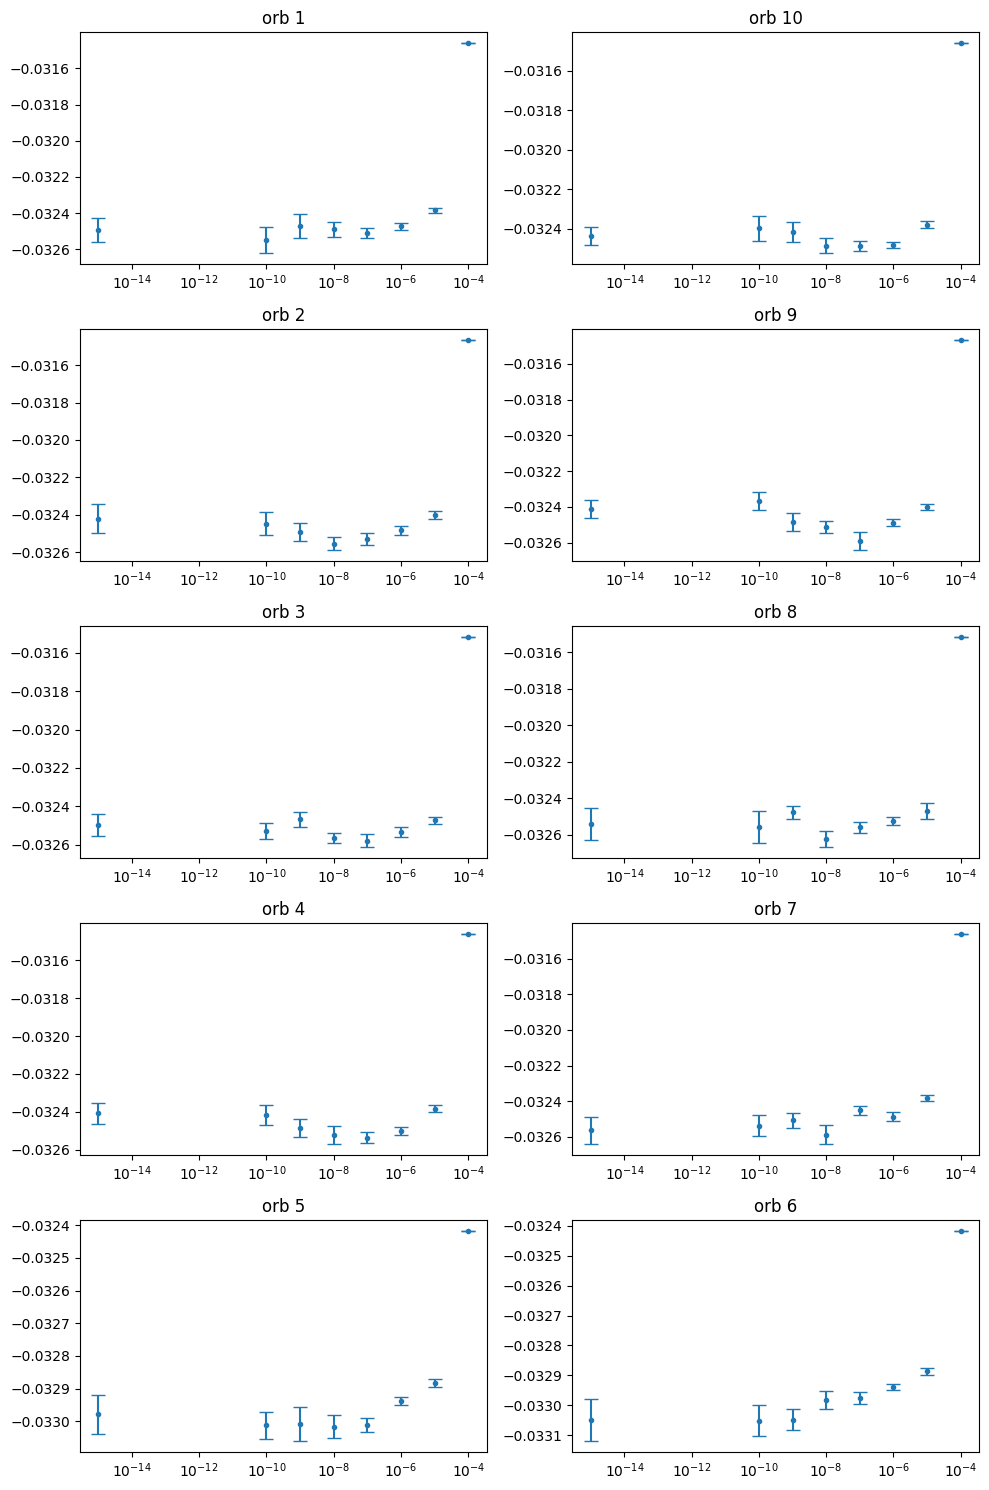

In [124]:
fig, axs = plt.subplots(5, 2, figsize=(10, 15))

axs[0, 0].errorbar(thresh,orb_en1,yerr=orb_en_err1,fmt='.',capsize=5)
axs[0, 0].set_title("orb 1")
axs[0, 0].set_xscale('log')

axs[0, 1].errorbar(thresh,orb_en10,yerr=orb_en_err10,fmt='.',capsize=5)
axs[0, 1].set_title("orb 10")
axs[0, 1].set_xscale('log')

axs[1, 0].errorbar(thresh,orb_en2,yerr=orb_en_err2,fmt='.',capsize=5)
axs[1, 0].set_title("orb 2")
axs[1, 0].set_xscale('log')

axs[1, 1].errorbar(thresh,orb_en9,yerr=orb_en_err9,fmt='.',capsize=5)
axs[1, 1].set_title("orb 9")
axs[1, 1].set_xscale('log')

axs[2, 0].errorbar(thresh,orb_en3,yerr=orb_en_err3,fmt='.',capsize=5)
axs[2, 0].set_title("orb 3")
axs[2, 0].set_xscale('log')

axs[2, 1].errorbar(thresh,orb_en8,yerr=orb_en_err8,fmt='.',capsize=5)
axs[2, 1].set_title("orb 8")
axs[2, 1].set_xscale('log')

axs[3, 0].errorbar(thresh,orb_en4,yerr=orb_en_err4,fmt='.',capsize=5)
axs[3, 0].set_title("orb 4")
axs[3, 0].set_xscale('log')

axs[3, 1].errorbar(thresh,orb_en7,yerr=orb_en_err7,fmt='.',capsize=5)
axs[3, 1].set_title("orb 7")
axs[3, 1].set_xscale('log')

axs[4, 0].errorbar(thresh,orb_en5,yerr=orb_en_err5,fmt='.',capsize=5)
axs[4, 0].set_title("orb 5")
axs[4, 0].set_xscale('log')

axs[4, 1].errorbar(thresh,orb_en6,yerr=orb_en_err6,fmt='.',capsize=5)
axs[4, 1].set_title("orb 6")
axs[4, 1].set_xscale('log')


plt.tight_layout()
plt.show()

In [ ]:
# 1 - 10
# 2 - 9
# 3 - 8
# 4 - 7 
# 5 - 6

In [8]:
data = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.187148       0.000000        -0.421019       0.033350        -0.316627       0.000004        -0.00965364  2.00       2       3.80    4       476.72
 (1.00e-04,1.00e-05)     -0.196230       0.000000        -0.377781       0.020587        -0.325252       0.000065        -0.00057141  5.60       6       5.60    6       609.19
 (1.00e-05,1.00e-06)     -0.196449       0.000000        -0.333101       0.041131        -0.325716       0.000059        -0.00035272  5.60       6       7.20    8       623.50
 (1.00e-06,1.00e-07)     -0.196778       0.000000        -0.303262       0.052289        -0.325683       0.000090        -0.00002323  8.80       10      10.20           12      750.77
 (1.00e-07,1.00e-08)     -0.196799       0.000000        -0.207468       0.190788        -0.325741       0.000119        -0.00000261  11.60      14      13.40           16      832.29
 (1.00e-09,1.00e-10)     -0.196801       0.000000        -0.365345       0.014977        -0.325659       0.000190        0.00000003  18.80       20      19.20           20      1140.47
'''
lno_thresh,lno_qmc_cc_corr,lno_qmc_cc_err,lno_cc_corr,mp2_cr = lno_data(data)

In [9]:
# a=1.831 d=3
# converged SCF energy = -10.7902563668634
# E_corr(MP2) -0.196801273811774
# E(RCCSD) = -11.11588133074048  E_corr = -0.3256249638770554
# DMRG energy (extrapolated) =  -11.116780958599403 +/- 0.0000000000
# AFQMC energy: -11.11581 +/- 0.00009
e_mf = -10.7902563668634
mp2_corr = -0.196801273811774
ccsd_corr = -0.3256249638770554
e_dmrg = -11.116780958599403
afqmc_e = -11.11581
afqmc_err = 0.00009

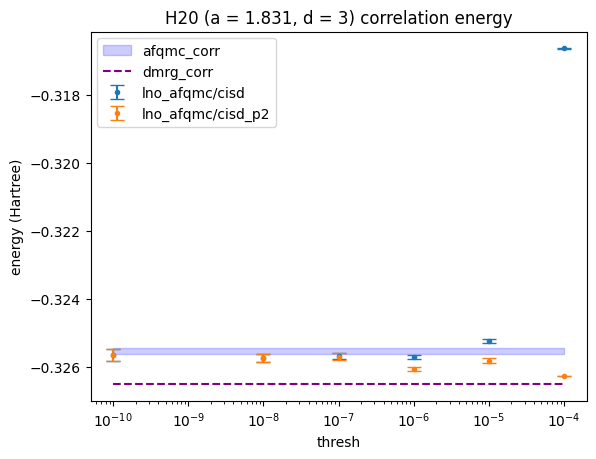

In [11]:
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc/cisd')
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr+mp2_cr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc/cisd_p2')
# plt.plot(
#     lno_thresh,lno_cc_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 1.831, d = 3) correlation energy')
plt.legend()
plt.show()

In [ ]:
# dt = 0.001
# a=d=1.831 eql
# converged SCF energy = -10.5113174115856
# RCCSD converged
# E(RCCSD) = -10.82386829894422  E_corr = -0.3125508873585868
# DMRG energy =  -10.832557941737981
# AFQMC energy: -10.83072 +/- 0.00009

e_mf = -10.5113174115856
mp2_corr = -0.196801273811774
ccsd_corr = -0.3125508873585868
e_dmrg = -10.832557941737981
afqmc_e = -10.8304
afqmc_err = 0.0001

data = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-03,1.00e-04)     -0.189450       -0.273243       -0.286624       0.003827        -0.273640       0.000033        -0.02298393  4.40       6       6.40    8       2104.93
 (1.00e-04,1.00e-05)     -0.210329       -0.310329       -0.271117       0.113695        -0.311616       0.000062        -0.00210430  8.40       10      11.00           13      2685.16
 (1.00e-05,1.00e-06)     -0.212140       -0.312911       -0.359209       0.017168        -0.316576       0.000117        -0.00029366  12.80      16      15.40           18      3228.95
 (1.00e-06,1.00e-07)     -0.212419       -0.312729       -0.120500       0.225190        -0.318315       0.000165        -0.00001463  17.60      20      18.80           20      3992.12
 (1.00e-07,1.00e-08)     -0.212433       -0.312574       -0.500375       0.197759        -0.318863       0.000189        -0.00000056  19.60      20      19.80           20      4301.87
'''
lno_thresh,lno_qmc_cc_corr,lno_qmc_cc_err,lno_cc_corr,mp2_cr = lno_ccsd.lno_data(data)

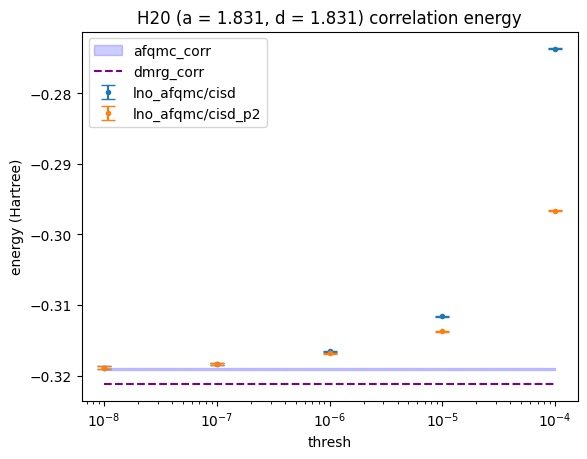

In [3]:
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc/cisd')
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr+mp2_cr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc/cisd_p2')
# plt.plot(
#     lno_thresh,lno_cc_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='afqmc_corr')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a = 1.831, d = 1.831) correlation energy')
plt.legend()
plt.show()

In [5]:
# T2 = 0
# a=d=1.831 eql
# converged SCF energy = -10.5113174115856
# RCCSD converged
# E(RCCSD) = -10.82386829894422  E_corr = -0.3125508873585868
# DMRG energy =  -10.832557941737981
# AFQMC energy: -10.8183 +/- 0.0003
e_mf = -10.5113174115856
ccsd_corr = -0.3125508873585868
e_dmrg = -10.832557941737981
afqmc_e = -10.8183
afqmc_err = 0.0003

data = '''
# thresh(occ,vir)   mp2_corr  ccsd_corr  olp_ratio  err  qmc_hf_cr  err  qmc_cc_cr0   err  qmc_cc_cr1   err  qmc_cc_cr2   err  qmc_cc_cr   err  qmc_corr   err  mp2_correction  nelec_avg   nelec_max  norb_avg   norb_max    run_time
  (1.00e-03,1.00e-04)  -0.189450  -0.273243  0.999556  0.000004  -0.270693  0.000319  0.009641  0.000114  -0.002174  0.000201  -0.007575  0.000097  -0.000108  0.000011  -0.270800       0.000318         -0.02298393  4.40      6        6.40           8       2488.25
  (1.00e-04,1.00e-05)  -0.210329  -0.310329  0.997162  0.000016  -0.304609  0.000543  0.068034  0.000521  -0.106296  0.000974  0.037481  0.000449  -0.000780  0.000018  -0.305387        0.000548         -0.00210430  8.40      10       11.00          13      3032.05
  (1.00e-05,1.00e-06)  -0.212140  -0.312911  0.995369  0.000026  -0.305693  0.000362  0.097506  0.001011  -0.185203  0.001945  0.086732  0.000941  -0.000963  0.000014  -0.306658        0.000363         -0.00029366  12.80     16       15.40          18      3615.43
  (1.00e-06,1.00e-07)  -0.212419  -0.312729  0.996077  0.000029  -0.306233  0.000352  0.097001  0.001284  -0.197780  0.002507  0.099936  0.001222  -0.000842  0.000010  -0.307075        0.000354         -0.00001463  17.60     20       18.80          20      4422.61
  (1.00e-07,1.00e-08)  -0.212433  -0.312574  0.997164  0.000021  -0.306931  0.000419  0.101575  0.001195  -0.208276  0.002328  0.105875  0.001139  -0.000824  0.000009  -0.307756        0.000423         -0.00000056  19.60     20       19.80          20      4677.99
'''
(lno_thresh,lno_mp2_corr,lno_ccsd_corr,olp_r,olp_r_err,
 qmc_hf_cr,qmc_hf_cr_err,qmc_cc_cr0,qmc_cc_cr0_err,
 qmc_cc_cr1,qmc_cc_cr1_err,qmc_cc_cr2,qmc_cc_cr2_err,
 qmc_cc_cr,qmc_cc_cr_err,qmc_corr,qmc_corr_err,mp2_cr,
 nelec_avg,nelec_max,norb_avg,norb_max,time) \
                = data_maker.lno_data_dbg(data)

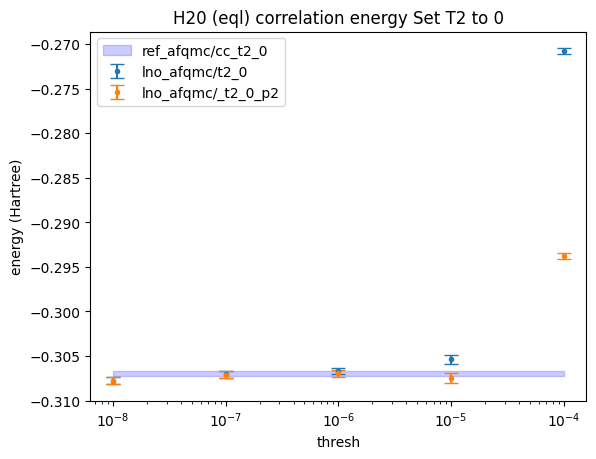

In [6]:
plt.errorbar(
    lno_thresh,qmc_corr,yerr=qmc_corr_err,fmt='.',capsize=5,label='lno_afqmc/t2_0')
plt.errorbar(
    lno_thresh,qmc_corr+mp2_cr,yerr=qmc_corr_err,fmt='.',capsize=5,label='lno_afqmc/_t2_0_p2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='ref_afqmc/cc_t2_0')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
# plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (eql) correlation energy Set T2 to 0')
plt.legend()
plt.show()

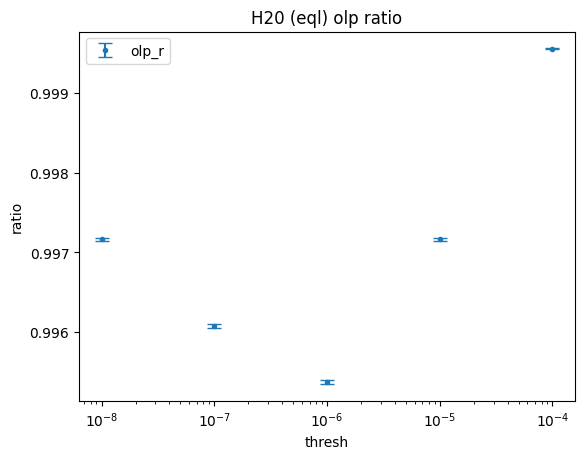

In [7]:
plt.errorbar(
    lno_thresh,olp_r,yerr=olp_r_err,fmt='.',capsize=5,label='olp_r')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
# x = np.linspace(min(lno_thresh),max(lno_thresh),100)
# plt.fill_between(
#     x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='ref_afqmc/cc_t2_0')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
# plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('ratio')
plt.title('H20 (eql) olp ratio')
plt.legend()
plt.show()

In [2]:
# T2 = 0
# a=d=3 bohr
# converged SCF energy = -9.03800449408404
# RCCSD not converged
# E(RCCSD) = -10.20185427865199  E_corr = -1.163849784567953
# DMRG energy =  -9.9610597130
# AFQMC energy: -9.8865 +/- 0.0007
e_mf = -9.03800449408404
ccsd_corr = -1.163849784567953
e_dmrg = -9.9610597130
afqmc_e = -9.8865
afqmc_err = 0.0007

data = '''
# lno-thresh(occ,vir)   mp2_corr  ccsd_corr  qmc/hf_corr   err   qmc/ccsd_corr   err   mp2_cr nelec_avg   nelec_max    norb_avg   norb_max    run_time
 (1.00e-02,1.00e-03)     -0.399750       -0.751631       -0.787751       0.123599        -0.751632       0.000000        -0.06091445  2.00       2       3.60    4       454.39
 (1.00e-03,1.00e-04)     -0.454792       -0.920122       -2.541357       1.760849        -0.881782       0.000475        -0.00587259  5.60       6       7.20    8       599.59
 (1.00e-04,1.00e-05)     -0.459550       -1.021173       -1.136161       0.343590        -0.900698       0.000712        -0.00111500  8.80       10      11.20           14      703.57
 (1.00e-05,1.00e-06)     -0.460539       -0.896772       -0.637286       0.473590        -0.883051       0.001338        -0.00012551  13.20      16      15.40           18      810.58
 (1.00e-06,1.00e-07)     -0.460657       -0.989256       -0.682669       0.359738        -0.841670       0.002061        -0.00000743  17.20      20      18.40           20      972.60
 (1.00e-07,1.00e-08)     -0.460665       -0.969070       -0.774753       0.245644        -0.843702       0.001899        -0.00000022  19.60      20      19.80           20      1066.48
 (1.00e-09,1.00e-10)     -0.460665       -1.004141       -0.758019       0.245010        -0.831956       0.001953        -0.00000010  20.00      20      20.00           20      1093.41
'''
lno_thresh,lno_qmc_cc_corr,lno_qmc_cc_err,lno_cc_corr,mp2_cr \
                = data_maker.lno_data(data)

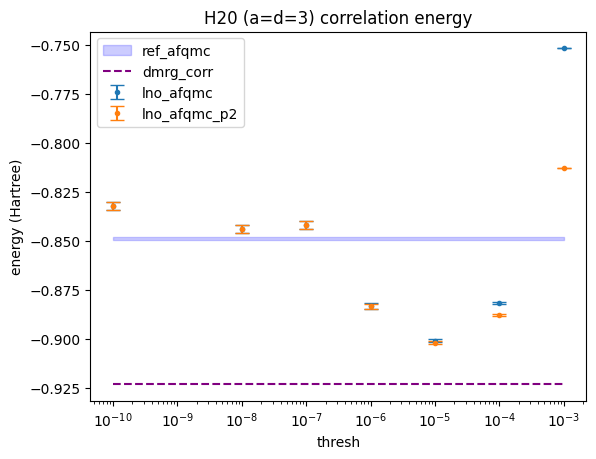

In [3]:
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc')
plt.errorbar(
    lno_thresh,lno_qmc_cc_corr+mp2_cr,yerr=lno_qmc_cc_err,fmt='.',capsize=5,label='lno_afqmc_p2')
# plt.plot(
#     lno_thresh,lno_ccsd_corr,'^',label='lno_ccsd')
x = np.linspace(min(lno_thresh),max(lno_thresh),100)
plt.fill_between(
    x, afqmc_e-e_mf+afqmc_err,afqmc_e-e_mf-afqmc_err, color='blue', alpha=0.2,label='ref_afqmc')
# plt.plot(x,[ccsd_corr]*100,'--',color='grey',label='ccsd_corr')
# plt.plot(x,[ccsd_t_corr]*100,'--',color='black',label='ccsd(t)_corr')
plt.plot(x,[e_dmrg-e_mf]*100,'--',color='purple',label='dmrg_corr')
plt.xlabel('thresh')
plt.xscale('log')
plt.ylabel('energy (Hartree)')
plt.title('H20 (a=d=3) correlation energy')
plt.legend()
plt.show()

In [ ]:
# from pyscf import gto, scf
# from ad_afqmc.lno.cc import LNOCCSD

# aB = 0.529177
# a = 1.831*aB #equ
# d = 3*aB
# nH = 20
# atoms = ""
# for n in range(nH):
#     if n % 2 == 0:
#         atoms += f"H {n/2*(a+d):.5f} 0.00000 0.00000 \n"
#     else:
#         atoms += f"H {(n-1)/2*(a+d)+a:.5f} 0.00000 0.00000 \n"

# mol = gto.M(atom=atoms, basis="sto6g", verbose=4)
# mf = scf.RHF(mol).density_fit()
# mf.kernel()

# lno_cc = LNOCCSD(mf, thresh=thresh)
# orbloc = lno_cc.get_lo(lo_type='boys')

System: uname_result(system='Linux', node='yichi-thinkpad', release='4.4.0-26100-Microsoft', version='#5074-Microsoft Fri Jan 01 08:00:00 PST 2016', machine='x86_64')  Threads 12
Python 3.10.16 | packaged by conda-forge | (main, Dec  5 2024, 14:16:10) [GCC 13.3.0]
numpy 1.24.3  scipy 1.14.1  h5py 3.12.1
Date: Wed Sep 10 21:19:36 2025
PySCF version 2.8.0
PySCF path  /home/yichi/research/software/lno_pyscf
GIT HEAD (branch master) ef75f4190e4de208685670651dc6c467f72b6794

[ENV] PYSCF_EXT_PATH /home/yichi/research/software/pyscf
[CONFIG] conf_file None
[INPUT] verbose = 4
[INPUT] num. atoms = 20
[INPUT] num. electrons = 20
[INPUT] charge = 0
[INPUT] spin (= nelec alpha-beta = 2S) = 0
[INPUT] symmetry False subgroup None
[INPUT] Mole.unit = angstrom
[INPUT] Symbol           X                Y                Z      unit          X                Y                Z       unit  Magmom
[INPUT]  1 H      0.000000000000   0.000000000000   0.000000000000 AA    0.000000000000   0.000000000000   0.

In [ ]:
# from pyscf.tools import molden
# with open("h20.molden", "w") as f:
#     molden.header(mol, f)
#     molden.orbital_coeff(mol,f,orbloc)